# Flow of a Darcy fluid across an anticline of heterogeneous permeability

$$\Omega = \{(x,y)~:~~R_{\text{inner}}^2 < x^2 + y^2 < R_{\text{outer}}^2~,~y>0\}$$

$$\partial\Omega_{\text{upper}} = \{(x,y)~:~x^2 + y^2 < R_{\text{outer}}^2\}$$

$$\partial\Omega_{\text{lower}} = \{(x,y)~:~x^2 + y^2 < R_{\text{inner}}^2\}$$

$$\partial\Omega_{\text{in}} = \{(x,y)~:~y=0~,~-R_{\text{outer}}<x<-R_{\text{inner}}\}$$

$$\partial\Omega_{\text{out}} = \{(x,y)~:~y=0~,~R_{\text{inner}}<x<R_{\text{outer}}\}$$

$\psi\vert_{\partial\Omega}$ is piecewise continuous and satisfies the incompressibility constraint.

$$(\textbf{n}\cdot\textbf{u})\vert_{\partial\Omega_{\text{upper}}}=0\implies\psi\vert_{\partial\Omega_{\text{upper}}}=0$$

$$(\textbf{n}\cdot\textbf{u})\vert_{\partial\Omega_{\text{in}}}=-u_{\text{in}}\implies\psi\vert_{\partial\Omega_{\text{in}}}=-u_{\text{in}}(x+R_{\text{outer}})$$

$$(\textbf{n}\cdot\textbf{u})\vert_{\partial\Omega_{\text{lower}}}=0\implies\psi\vert_{\partial\Omega_{\text{lower}}}=-u_{\text{in}}(R_{\text{outer}}-R_{\text{inner}})$$

$$(\textbf{n}\cdot\textbf{u})\vert_{\partial\Omega_{\text{out}}}=u_{\text{in}}\implies\psi\vert_{\partial\Omega_{\text{out}}}=u_{\text{in}}(x-R_{\text{outer}})$$

$$\mathsf{K}(\textbf{x})=\mathcal{N}(\textbf{x})\mathsf{I}$$

$$\mu=1$$

In [1]:
import numpy as np

from lucifex.fem import LUCiFExFunction as Function, LUCiFExConstant as Constant
from lucifex.mesh import annulus_sector_mesh, mesh_boundary
from lucifex.solver import BoundaryConditions, bvp_solver
from lucifex.viz import plot_contours, plot_mesh, plot_colormap
from lucifex.utils import DofsPerturbation
from lucifex.io import write, get_ipynb_file_name

from lucifex.pde.darcy import darcy_streamfunction


Rinner = 1.0
Router = 2.0
Nradial = 10
dr = (Router - Rinner) / Nradial
mesh = annulus_sector_mesh(dr, 'triangle', 'anticline')(Rinner, Router, 180)

r2 = lambda x: x[0]**2 + x[1]**2
boundary = mesh_boundary(
    mesh, 
    {
        "lower": lambda x: r2(x) - Rinner**2,
        "upper": lambda x: r2(x) - Router**2,
        "in": lambda x: np.logical_and(np.isclose(x[1], 0.0), x[0] < 0),
        "out": lambda x: np.logical_and(np.isclose(x[1], 0.0), x[0] > 0),
    },
)

mu = Constant(mesh, 1.0)
k_lims = (0.05, 1.0)
k_noise = DofsPerturbation(
    0.0,
    1234,
    k_lims,
    (16, 16)
)
k = k_noise.combine_base_noise((mesh, 'P', 1), name='k')

psi = Function((mesh, 'P', 2), name='psi')
u_in = 1.0
psi_bcs = BoundaryConditions(
    ('dirichlet', boundary['upper'], 0.0),
    ('dirichlet', boundary['in'], lambda x: -u_in * (x[0] + Router)),
    ('dirichlet', boundary['lower'], -u_in * (Router - Rinner)),
    ('dirichlet', boundary['out'], lambda x: u_in * (x[0] - Router)),
)
psi_solver = bvp_solver(darcy_streamfunction, psi_bcs)(psi, k, mu)
psi_solver.solve()

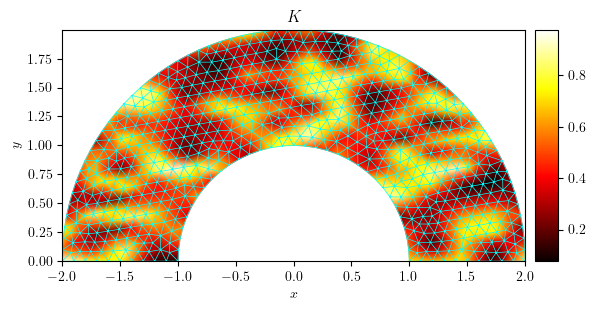

In [3]:
fig, ax = plot_colormap(k, title='$K$', x_label='$x$', y_label='$y$')
plot_mesh(fig, ax, mesh, color='cyan', linewidth=0.5)
write(fig, f'{get_ipynb_file_name()}_mesh', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

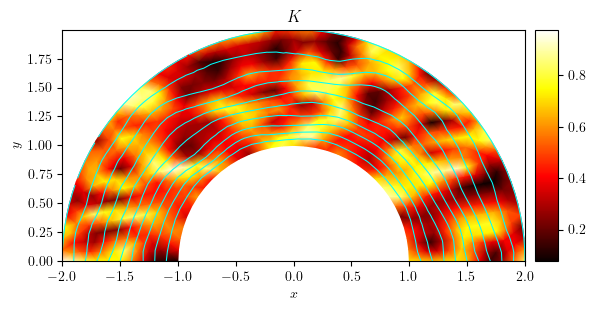

: 

In [ ]:
fig, ax = plot_colormap(k, title='$K$', x_label='$x$', y_label='$y$')
plot_contours(fig, ax, psi, colors='cyan', levels=10)
write(fig, f'{get_ipynb_file_name()}_streamlines', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

In [12]:
__vsc_ipynb_file__

'/Users/George/Desktop/LUCiFEx/demo/A01.2_darcy_anticline.ipynb'